# Task B -- None deep learning Method

Import packages

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread
from skimage.transform import resize

from sklearn import metrics, datasets
from sklearn import svm, neighbors
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Import and flat images

In [2]:
# path of the files
image_path = './dataset/image/' 
label_table = './dataset/label.csv'

# import the csv file
dataset = pd.read_csv(label_table)

# set the dimension of the resized images for faster data processing
dimension = (64,64)

# category
category = ['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'no_tumor']

# load the images and labelling
data = []
target = []  
for index in range(len(dataset)):
    # get the label
    label = str(dataset.iloc[index, 1])
    target.append(label) 
    # get the image
    imgPath = image_path + dataset.iloc[index,0]
    img = imread(imgPath, as_gray=True)
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
    data.append(img_resized.flatten())       

# change to array
data = np.array(data)
target = np.array(target)


SVC with linear kernel

Classification report for - 
GridSearchCV(estimator=SVC(C=100, kernel='linear'), param_grid={},
             return_train_score=True):
                  precision    recall  f1-score   support

    glioma_tumor       0.72      0.77      0.75       177
meningioma_tumor       0.72      0.68      0.70       174
        no_tumor       0.78      0.71      0.75        87
 pituitary_tumor       0.95      0.97      0.96       162

        accuracy                           0.79       600
       macro avg       0.79      0.78      0.79       600
    weighted avg       0.79      0.79      0.79       600


The accuracy is 79.16666666666666%.


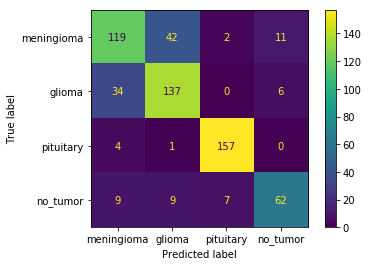

In [3]:
param_grid = {}
C = 100  # SVM regularization parameter
model = svm.SVC(kernel='linear', C=C)


x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=10)


classifier = GridSearchCV(model, param_grid, return_train_score=True)

classifier.fit(x_train, y_train)
    
y_pred = classifier.predict(x_test)
print("Classification report for - \n{}:\n{}\n".format(classifier, metrics.classification_report(y_test, y_pred)))
print(f"The accuracy is {accuracy_score(y_pred,y_test)*100}%.")

# make confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=category)
category_disp = ['meningioma', 'glioma', 'pituitary', 'no_tumor']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_disp)
disp.plot()

SVC with RBF kernel

Classification report for - 
GridSearchCV(estimator=SVC(C=100, gamma=0.01), param_grid={},
             return_train_score=True):
                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.84      0.88       177
meningioma_tumor       0.83      0.89      0.86       174
        no_tumor       0.87      0.83      0.85        87
 pituitary_tumor       0.95      0.99      0.97       162

        accuracy                           0.89       600
       macro avg       0.89      0.89      0.89       600
    weighted avg       0.89      0.89      0.89       600


The accuracy is 89.33333333333333%.


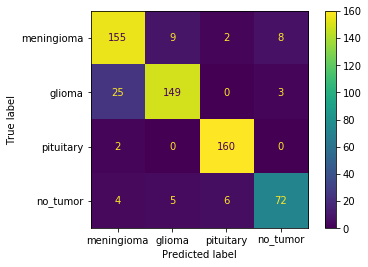

In [4]:
param_grid = {}
C = 100  # SVM regularization parameter
model = svm.SVC(kernel='rbf', gamma=0.01, C=C)


x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=10)


classifier = GridSearchCV(model, param_grid, return_train_score=True)

classifier.fit(x_train, y_train)
    
y_pred = classifier.predict(x_test)
print("Classification report for - \n{}:\n{}\n".format(classifier, metrics.classification_report(y_test, y_pred)))
print(f"The accuracy is {accuracy_score(y_pred,y_test)*100}%.")

# make confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=category)
category_disp = ['meningioma', 'glioma', 'pituitary', 'no_tumor']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_disp)
disp.plot()

SVC with polynomial (degree 3) kernel

Classification report for - 
GridSearchCV(estimator=SVC(C=100, kernel='poly'), param_grid={},
             return_train_score=True):
                  precision    recall  f1-score   support

    glioma_tumor       0.81      0.86      0.84       177
meningioma_tumor       0.80      0.78      0.79       174
        no_tumor       0.83      0.69      0.75        87
 pituitary_tumor       0.91      0.98      0.94       162

        accuracy                           0.84       600
       macro avg       0.84      0.82      0.83       600
    weighted avg       0.84      0.84      0.84       600


The accuracy is 84.16666666666667%.


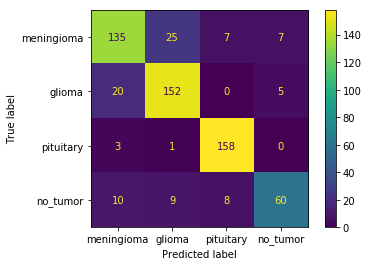

In [5]:
param_grid = {}
C = 100  # SVM regularization parameter
model = svm.SVC(kernel='poly', degree=3, C=C)


x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=10)


classifier = GridSearchCV(model, param_grid, return_train_score=True)

classifier.fit(x_train, y_train)
    
y_pred = classifier.predict(x_test)
print("Classification report for - \n{}:\n{}\n".format(classifier, metrics.classification_report(y_test, y_pred)))
print(f"The accuracy is {accuracy_score(y_pred,y_test)*100}%.")

# make confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=category)
category_disp = ['meningioma', 'glioma', 'pituitary', 'no_tumor']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_disp)
disp.plot()

# 